## What is Hypothesis Testing?
Hypothesis testing is an essential part in inferential statistics where we use observed data in a sample to draw conclusions about unobserved data - often the population.

## 4 Steps in Hypothesis testing
### Step 1. Define null and alternative hypothesis
Null hypothesis (H0) can be stated differently depends on the statistical tests, but generalize to the claim that no difference, no relationship or no dependency exists between two or more variables.

Alternative hypothesis (H1) is contradictory to the null hypothesis and it claims that relationships exist. It is the hypothesis that we would like to prove right. However, a more conservational approach is favored in statistics where we always assume null hypothesis is true and try to find evidence to reject the null hypothesis.

### Step 2. Choose the appropriate test
Common Types of Statistical Testing including t-tests, z-tests, anova test and chi-square test

how to choose the statistical test

T-test: compare two groups/categories of numeric variables with small sample size

Z-test: compare two groups/categories of numeric variables with large sample size

ANOVA test: compare the difference between two or more groups/categories of numeric variables

Chi-Squared test: examine the relationship between two categorical variables

Correlation test: examine the relationship between two numeric variables

### Step 3. Calculate the p-value
How p value is calculated primarily depends on the statistical testing selected. Firstly, based on the mean and standard deviation of the observed sample data, we are able to derive the test statistics value (e.g. t-statistics, f-statistics). Then calculate the probability of getting this test statistics given the distribution of the null hypothesis, we will find out the p-value. We will use some examples to demonstrate this in more detail.


### Step 4. Determine the statistical significance
p value is then compared against the significance level (also noted as alpha value) to determine whether there is sufficient evidence to reject the null hypothesis. The significance level is a predetermined probability threshold - commonly 0.05. If p value is larger than the threshold, it means that the value is likely to occur in the distribution when the null hypothesis is true. On the other hand, if lower than significance level, it means it is very unlikely to occur in the null hypothesis distribution - hence reject the null hypothesis.

#### Kaggle dataset “Customer Personality Analysis” is used in this case study to demonstrate different types of statistical test. T-test, ANOVA and Chi-Square test are sensitive to large sample size, and almost certainly will generate very small p-value when sample size is large .

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns
import scipy

In [ ]:
df= pd.read_csv("marketing_campaign.csv", sep='\t')

In [ ]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


#####  Therefore, I took a random sample (size of 100) from the original data:

In [ ]:
sampled_df = df.sample(n=100, random_state=100)


## T-Test
T-test is used when we want to test the relationship between a numeric variable and a categorical variable.There are three main types of t-test.

### one sample t-test: test the mean of one group against a constant value

### two sample t-test: test the difference of means between two groups

### paired sample t-test: test the difference of means between two measurements of the same subject

For example, if I would like to test whether “Recency” (the number of days since customer’s last purchase - numeric value) contributes to the prediction of “Response” (whether the customer accepted the offer in the last campaign - categorical value), I can use a two sample t-test.

The first sample would be the “Recency” of customers who accepted the offer:

In [ ]:
recency_P = sampled_df[sampled_df['Response']==1]['Recency']

#### The second sample would be the “Recency” of  customers who rejected the offer:



In [ ]:
recency_N = sampled_df[sampled_df['Response']==0]['Recency']

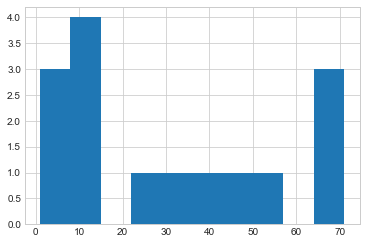

In [ ]:
plt.hist(recency_P)
plt.show()

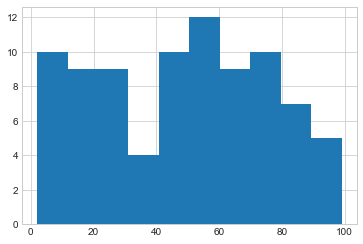

In [ ]:
plt.hist(recency_N)
plt.show()

It appears that positive response have lower Recency compared to negative response. To quantify the difference and make it more scientific, let’s follow the steps in hypothesis testing and carry out a t-test.



### Step1. define null and alternative hypothesis

null: there is no difference in Recency between the customers who accepted the offer in the last campaign and who did not accept the offer

alternative: customers who accepted the offer has lower Recency compared to customers who did not accept the offer

### Step 2. choose the appropriate test

To test the difference between two independent samples, two-sample t-test is the most appropriate statistical test which follows student t-distribution. The shape of student-t distribution is determined by the degree of freedom, calculated as the sum of two sample size minus 2.

In python, simply import the library scipy.stats and create the t-distribution as below.

In [ ]:
from scipy.stats import t
rv = t(df=100-2)

### Step 3. calculate the p-value

There are some handy functions in Python calculate the probability in a distribution. For any x covered in the range of the distribution, pdf(x) is the probability density function of x — which can be represented as the orange line below, and cdf(x) is the cumulative density function of x — which can be seen as the cumulative area. In this example, we are testing the alternative hypothesis that — Recency of positive response minus the Recency of negative response is less than 0. Therefore we should use a one-tail test and compare the t-statistics we get against the lowest value in this distribution — therefore p-value can be calculated as cdf(t_statistics) in this case.

#### ttest_ind() is a handy function for independent t-test in python that has done all of these for us automatically. Pass two samples rececency_P and recency_N as the parameters, and we get the t-statistics and p-value.



In [ ]:
# TWo sampled t-test
from scipy.stats import ttest_ind

t_stat,pvalue = ttest_ind(recency_P,recency_N)
print('t-statistics:',t_stat, '\nP-value', pvalue)

t-statistics: -2.2792332995612146 
P-value 0.024822208644980654


### Step 4. determine the statistical significance

The commonly used significance level threshold is 0.05. Since p-value here (0.024) is smaller than 0.05, we can say that it is statistically significant based on the collected sample. A lower Recency of customer who accepted the offer is likely not occur by chance. This indicates the feature “Response” may be a strong predictor of the target variable “Recency”. And if we would perform feature selection for a model predicting the "Recency" value, "Response" is likely to have high importance.

## ANOVA Test
Now that we know t-test is used to compare the mean of one or two sample groups. What if we want to test more than two samples?  Use ANOVA test.

ANOVA examines the difference among groups by calculating the ratio of variance across different groups vs variance within a group. Larger ratio indicates that the difference across groups is a result of the group difference rather than just random chance.

As an example, I use the feature “Kidhome” for the prediction of “NumWebPurchases”. There are three values of “Kidhome” - 0, 1, 2 which naturally forms three groups.

In [ ]:
kidhome_0 = sampled_df[sampled_df['Kidhome']==0]['NumWebPurchases']
kidhome_1 = sampled_df[sampled_df['Kidhome']==1]['NumWebPurchases']
kidhome_2 = sampled_df[sampled_df['Kidhome']==2]['NumWebPurchases']

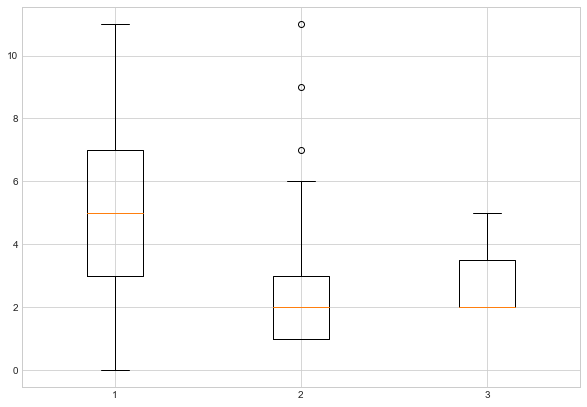

In [ ]:
# Firstly, visualize the data. I found box plot to be the most aligned visual representation of ANOVA test.

kidhome_data = [kidhome_0,kidhome_1,kidhome_2]
fig = plt.figure(figsize=(10,7))

plt.boxplot(kidhome_data)
plt.show()


It appears there are distinct differences among three groups. So let’s carry out ANOVA test to prove if that’s the case.

#### 1. define hypothesis:

null hypothesis: there is no difference among three groups

alternative hypothesis: there is difference between at least two groups

#### 2. choose the appropriate test:
ANOVA test for examining the relationships of numeric values against a categorical value with more than two groups. Similar to t-test, the null hypothesis of ANOVA test also follows a distribution defined by degrees of freedom. The degrees of freedom in ANOVA is determined by number of total samples (n) and the number of groups (k).

dfn = k - 1

dfd = n - k

In [ ]:
from scipy.stats import f
dfn = 3-1
dfd = 100-3
rv = f(dfn, dfd)

#### 3. calculate the p-value:
To calculate the p-value of the f-statistics, we use the right tail cumulative area of the f-distribution, which is 1 - rv.cdf(x).

In [ ]:
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100000)
y = rv.pdf(x)
pvalue = 1 - rv.cdf(x)

To easily get the f-statistics and p-value using Python, we can use the function stats.f_oneway() which returns p-value: 0.00040.

In [ ]:
from scipy import stats
f_stat, pvalue = stats.f_oneway(kidhome_0, kidhome_1, kidhome_2)
pvalue

0.00039808004666969554

#### 4. determine the statistical significance:
Compare the p-value against the significance level 0.05, we can infer that there is strong evidence against the null hypothesis and very likely that there is difference in “NumWebPurchases” between at least two groups.

### Chi-Squared Test
Chi-Squared test is for testing the relationship between two categorical variables. The underlying principle is that if two categorical variables are independent, then one categorical variable should have similar composition when the other categorical variable change. Let’s look at the example of whether “Education” and “Response” are independent.

First, use stacked bar chart and contingency table to summary the count of each category.

In [ ]:
ed_contingency = pd.crosstab(sampled_df['Education'],
 sampled_df['Response'])
ed_contingency

Response,0,1
Education,,
2n Cycle,13,3
Basic,2,0
Graduation,44,5
Master,9,4
PhD,17,3


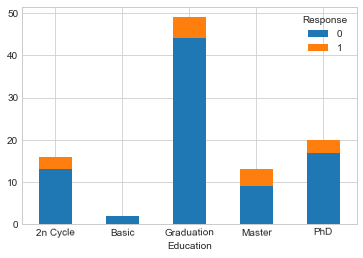

In [ ]:
ax = ed_contingency.plot(kind='bar', stacked=True, rot=1)
ax.legend(title='Response')

If these two variables are completely independent to each other (null hypothesis is true), then the proportion of positive Response and negative Response should be the same across all Education groups. It seems like composition are slightly different, but is it significant enough to say there is dependency - let’s run a Chi-Squared test.

### 1. define hypothesis:

null hypothesis: “Education” and “Response” are independent to each other.

alternative hypothesis: “Education” and “Response” are dependent to each other.

### 2. choose the appropriate test:
Chi-Squared test is chosen and you probably found a pattern here, that Chi-distribution is also determined by the degree of freedom which is (row - 1) x (column - 1).

In [ ]:
from scipy.stats import chi2
r = 5
c = 2
dof = (5-1) * (2-1)
rv = chi2(df= dof)

### 3. calculate the p-value:
p value is calculated as the right tail cumulative area: 1 - rv.cdf(x).



In [ ]:
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100000)
y = rv.pdf(x)
pvalue = 1 - rv.cdf(x)

Python also provides a useful function to get the chi statistics and p-value given the contingency table.



In [ ]:
import scipy.stats
chi2_stat, pvalue, dof, exp = scipy.stats.chi2_contingency(ed_contingency)
chi2_stat

3.9488102933481084

In [ ]:
pvalue

0.4129779495497867

### 4. determine the statistical significance:
the p-value here is 0.41, suggesting that it is not statistical significant. Therefore, we cannot reject the null hypothesis that these two categorical variables are independent.

This further indicates that “Education” may not be a strong predictor of “Response”.

